# PARTIE 4 — Statistique bivariée

Analyse des relations entre deux variables à l’aide de tableaux synthétiques et graphiques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(style="whitegrid")
except:
    sns = None

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/microsoft/Science des données pour débutants/Formation_Statistique/ecommerce_dataset.csv')
df.head()

Mounted at /content/drive


,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04


# 🧭 Récap des méthodes bivariées


| Relation | Exemple | Indicateurs | Graphiques
| :--- | :---: | ---: | ---: |
| QUANTI ↔ QUANTI | revenu_mensuel ↔ montant_panier | covariance, corrélation | scatter plot |
|QUALI ↔ QUANTI (2 modalités)|	sexe ↔ montant_panier	| moyennes par groupe |	boxplot, violin plot |
| QUALI ↔ QUANTI (3+ modalités)	|segment_age ↔ montant_panier	|	moyennes par groupe	| boxplot, barplot	|
| QUALI ↔ QUALI	sexe | ↔ retour_produit |	table de contingence |	countplot, heatmap |


**CAS 1 — QUANTI ↔ QUANTI**

**Exemple** : revenu_mensuel ↔ montant_panier

Tableau synthétique

| Élément | Contenu |
| :--- | :---: |
| Variables |	revenu_mensuel (X), montant_panier (Y) |
|Indicateurs |	Covariance, Corrélation |
|Graphique |	Scatter plot|
| Objectif | Voir la force et le sens de la relation|


Text(0.5, 1.0, 'Scatter plot -- revenu vs panier')

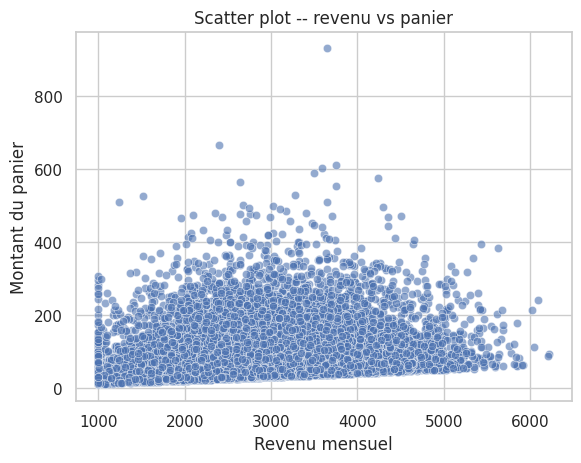

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

#variables quantitatives
x = df['revenu_mensuel']
y = df['montant_panier']

plt.figure()
if sns: sns.scatterplot(x=x, y=y, alpha=0.6)
else: plt.scatter(x, y, alpha=0.6)
plt.xlabel('Revenu mensuel')
plt.ylabel('Montant du panier')
plt.title('Scatter plot -- revenu vs panier')

Analyse

Le constat : On ne voit pas de "ligne droite" qui monte. Les points forment un nuage plat et étalé.

L'explication simple : Cela signifie qu'un client qui gagne 5 000 € ne dépense pas forcément plus chez nous qu'un client qui gagne 2 000 €.

La conclusion : Le revenu n'est pas le moteur principal de l'achat. Un client "modeste" peut être un gros acheteur, et un client "aisé" peut ne faire que des petits achats.

In [ ]:
# --- Covariance ---

cov_xy = np.cov(x, y, ddof=1)[0, 1]

# --- Corrélation de Pearson (lineaire) ---
pearson_r, pearson_p = stats.pearsonr(x, y)

# --- Corrélation de Spearman (monotone) ---
spearman_rho, spearman_p = stats.spearmanr(x, y)

# --- Corrélation de Kendall (τ) ---
kendall_tau, kendall_p = stats.kendalltau(x, y)

print(" Covariance :", cov_xy)
print(f" Corrélation de Pearson : r = {pearson_r:.3f} (p = {pearson_p:.3e})")
print(f" Corrélation de Spearman : ρ = {spearman_rho:.3f} (p = {spearman_p:.3e})")
print(f" Corrélation de Kendall : τ = {kendall_tau:.3f} (p = {kendall_p:.3e})")

 Covariance : 7974.862474043824
 Corrélation de Pearson : r = 0.139 (p = 8.627e-66)
 Corrélation de Spearman : ρ = 0.209 (p = 3.977e-147)
 Corrélation de Kendall : τ = 0.143 (p = 5.134e-151)


**Interprétation de la covariance et des corrélations**

| Mesure | Valeurs possibles | Interprétation du signe | Interprétation de l’amplitude | Quand l’utiliser ? |
| :--- | :--- | :--- | :--- | :--- |
| Mesure | Valeurs possibles | Interprétation du signe | Interprétation de l’amplitude | Quand l’utiliser ? |



**À retenir**

* La covariance indique seulement si X et Y varient dans le même sens.
* Les corrélations normalisent la covariance et deviennent comparables et interprétables.
* Pearson = linéaire, Spearman = monotone, Kendall = robuste.

# CAS 2 — QUALI ↔ QUANTI

**Deux modalités (ex : sexe → montant_panier)**

Tableau Contenu

| Élément | Contenu |
| :--- | :---: |
| Variables |	sexe (X), montant_panier (Y) |
|Indicateurs |	Moyennes par catégorie |
|Graphique | Boxplot, violin plot|
| Objectif | Comparer deux groupes|

In [ ]:
var_quali = 'sexe'
var_quanti = 'montant_panier'
df[[var_quali, var_quanti]].groupby(var_quali).describe().T

sexe                        Femme        Homme
montant_panier count  7479.000000  7521.000000
               mean     87.985717    98.698502
               std      62.056393    69.787790
               min      10.320000    11.430000
               25%      45.050000    51.340000
               50%      69.830000    77.940000
               75%     111.410000   124.250000
               max     664.400000   929.970000

Text(0.5, 1.0, 'Boxplot - montant du panier par sexe')

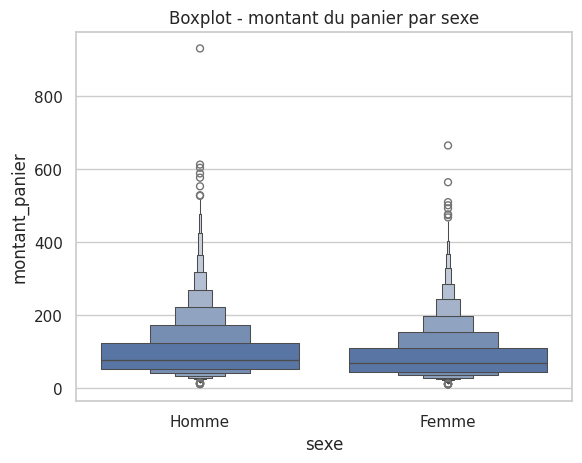

In [ ]:
sns.boxenplot(x='sexe', y='montant_panier', data=df)
plt.title('Boxplot - montant du panier par sexe')

In [ ]:
# Analyse
# On constate que la mediane des homme est > a celle de Femme.
# taille des homme est > a celle des Femme
# Les valeurs extremes est plus elevés coté homme que des femmes

# Trois modalités ou plus (ex : segment_age → montant_panier)

Tableau Contenu

| Élément | Contenu |
| :--- | :---: |
| Variables |	segment_age, montant_panier (Y) |
|Indicateurs |	Moyennes par groupe |
|Graphique | Boxplot, barplot|
| Objectif | Comparer plusieurs groupes|

In [ ]:

df.groupby("segment_age")["montant_panier"].agg(
    moyenne = "mean",
    mediane = "median",
    variance = "var",
    ecart_type = "std",
    minimum = "min",
    Q1 = lambda x: x.quantile(0.25),
    Q2 = "median",
    Q3 = lambda x: x.quantile(0.75),
    maximum = "max",
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25),
    etendue = lambda x: x.max() - x.min()
)

,moyenne,mediane,variance,ecart_type,minimum,Q1,Q2,Q3,maximum,IQR,etendue
segment_age,,,,,,,,,,,
Adulte,93.912940,73.85,4527.006478,67.283033,10.32,48.5625,73.85,117.2150,929.97,68.6525,919.65
Jeune,92.168079,73.62,4004.260479,63.279226,11.32,48.7100,73.62,115.6500,470.16,66.9400,458.84
Mature,92.670004,72.72,4302.766874,65.595479,10.37,47.7625,72.72,117.2725,603.40,69.5100,593.03
Senior,102.859880,86.46,4912.568110,70.089715,23.21,51.6550,86.46,129.4950,498.11,77.8400,474.90


In [ ]:
# On peut le faire autrement

var_multi_quali = 'segment_age'
var_quanti = 'montant_panier'
df[[var_multi_quali, var_quanti]].groupby(var_multi_quali).describe().T

segment_age                Adulte        Jeune       Mature      Senior
montant_panier count  7608.000000  1676.000000  5550.000000  166.000000
               mean     93.912940    92.168079    92.670004  102.859880
               std      67.283033    63.279226    65.595479   70.089715
               min      10.320000    11.320000    10.370000   23.210000
               25%      48.562500    48.710000    47.762500   51.655000
               50%      73.850000    73.620000    72.720000   86.460000
               75%     117.215000   115.650000   117.272500  129.495000
               max     929.970000   470.160000   603.400000  498.110000

Text(0.5, 1.0, "Boxplot - panier par segment d'age")

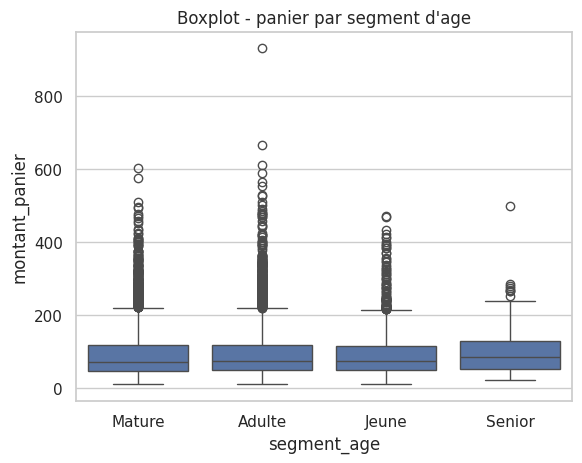

In [ ]:
plt.figure()
sns.boxplot(x='segment_age', y='montant_panier', data=df)
plt.title("Boxplot - panier par segment d'age")

In [ ]:
# Analyse
# On constate que la mediane des senior est légerement plus élevée.
# Les JEUNES ont tendance à dépenser moins que le SENIOR.
# Les ADULTES ET LES MATURES sont sensiblement proche

# CAS 3 — QUALI ↔ QUALI

**Exemple : sexe ↔ retour_produit**

Tableau synthétique

| Élément | Contenu |
| :--- | :---: |
| Variables |	sexe, retour_produit |
|Indicateurs |Table de contingence|
|Graphique | Countplot, heatmap|
| Objectif | Examiner l'association entre deux catégories|

In [ ]:
table = pd.crosstab(df['sexe'], df['retour_produit'])
table

retour_produit,Non,Oui
sexe,,
Femme,6722,757
Homme,6718,803


In [ ]:
# Analyse
# ce tableau nous montre que 6722 des FEMMES n'ont pas un retourne de produit et 757 ont retourné un produit
# ce tableau nous montre que 6718 des HOMMES n'ont pas un retourne de produit et 803 ont retourné un produit

In [ ]:
# Table de contingence brute
table = pd.crosstab(df['sexe'], df['retour_produit'])

# table des proportion(chaque ligne = 100%)
table_prop = table.div(table.sum(axis=1), axis=0) * 100
table_prop

retour_produit,Non,Oui
sexe,,
Femme,89.878326,10.121674
Homme,89.323228,10.676772


In [ ]:
# Analyse
# 89.87% des FEMMES ne retournent pas un produit et 10.12% retournent un produit
# 89.32% des HOMMES ne retournent pas un produit et 10.67% retournent un produit
# il semble que les HOMMES retounent plus légerement un produit que les FEMME

In [ ]:
# Table de contingence brute(avec segment_age)
table = pd.crosstab(df['segment_age'], df['retour_produit'])

# table des proportion(chaque ligne = 100%)
table_prop = table.div(table.sum(axis=1), axis=0) * 100
table_prop

retour_produit,Non,Oui
segment_age,,
Adulte,89.905363,10.094637
Jeune,89.200477,10.799523
Mature,89.243243,10.756757
Senior,91.566265,8.433735


In [ ]:
# Analyse
# Pour les categories d'age on constate que les JEUNES retounent plus un produit(10.79% des jeunes)
#suivie des MATURE (10.75%)
# Ainsi des ADULTES (10.09%)
# En fin les SENIOR (8.43%)

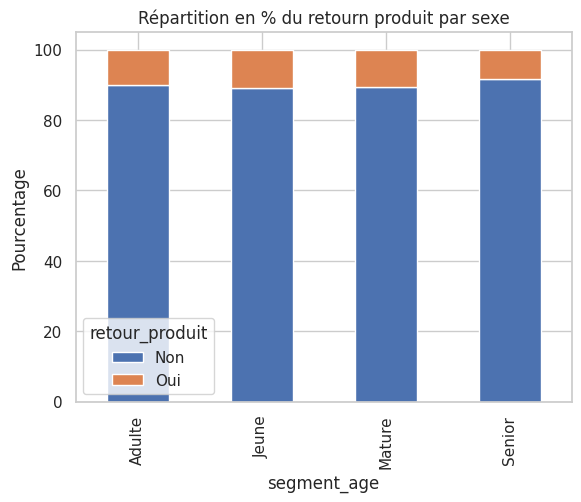

In [ ]:
table_prop.plot(kind='bar', stacked=True)
plt.title("Répartition en % du retourn produit par sexe")
plt.ylabel('Pourcentage')
plt.show()

In [ ]:
# Analyse du graph
# # il semble que les HOMMES retounent plus légerement un produit que les FEMME

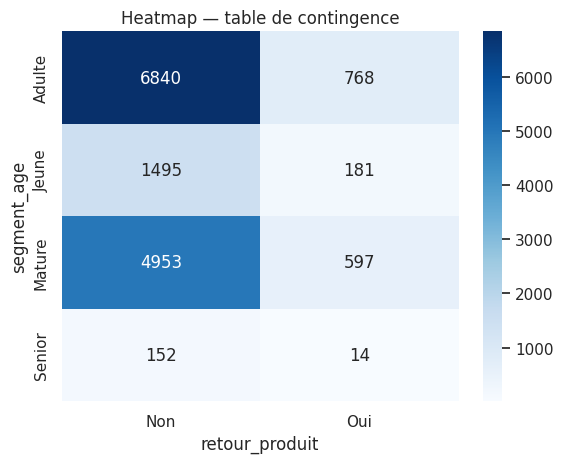

In [ ]:
plt.figure()
sns.heatmap(table, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap — table de contingence")
plt.show()